In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv("Dataset_multivariable.csv")
datos.head()

,x1,x2,x3,x4,x5,y
0,1.0,0.4,-12.0,12.0,10.2,11.6
1,1.0,0.6,-15.0,16.0,11.9,14.5
2,1.0,0.8,-18.0,20.0,13.6,17.4
3,1.0,1.0,-21.0,24.0,15.3,20.3
4,1.0,1.2,-24.0,28.0,17.0,23.2


In [3]:
iteracion = int(input("Numero de iteraciones: "))
alpha = float(input("Introduce el valor de alpha: "))
pesos_ini=[]
for i in range(len(datos.columns)-1):
    aux=int(input('Introduzca el peso inicial:'))
    pesos_ini.append(aux)



In [4]:
pesos_ini

[0, 0, 0, 0, 0]

In [5]:
X = datos.drop(['y'],axis=1).values
y = datos['y'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=0)

In [6]:
X_train.shape[1]

5

In [7]:
def iter_pesos(X_train,y_train,alpha,iteracion,pesos_ini):
    elementos = [X_train[:, i] for i in range(X_train.shape[1])]
    pesos = []  
    for j in range(iteracion):
        for i in range(len(elementos)):
            peso = pesos_ini[i]
            columna = elementos[i]
            sum = 0
            for x, y in zip(columna, y_train):
                aux = (pesos_ini[i] * x - y) * x
                sum += aux
            pesos_ini[i] = pesos_ini[i] - 2 * alpha * sum
        pesos.append(pesos_ini.copy())  # Es importante copiar los pesos_ini para evitar referencias
    return pesos

In [8]:
peso = iter_pesos(X_train,y_train,alpha,iteracion,pesos_ini)

In [9]:
peso

[[0.0020532,
  0.0030832800000000007,
  -0.0585684,
  0.0698784,
  0.040169640000000006],
 [0.004106227531199999,
  0.006166037569036801,
  -0.1135882577808,
  0.13371930624,
  0.07918998642996],
 [0.006159082608087379,
  0.009248272795631104,
  -0.1652745724183769,
  0.19204435818086402,
  0.11709392172821242],
 [0.0082117652451483,
  0.012329985768288613,
  -0.2138293166246923,
  0.24533012563403736,
  0.15391338753364653]]

In [10]:
def predic(X_test, pesos):
    pred = []
    for columna in pesos:
        pred_temp = [] 
        for fila_x in X_test:
            sum = 0
            for valor_columna, valor_x in zip(columna, fila_x):
                sum += valor_columna * valor_x
            pred_temp.append(sum) 
        pred.append(pred_temp) 
    return pred


In [11]:
pred= predic(X_test,peso)

In [12]:
pred

[[3.002626128, 6.147369192, 4.050873816],
 [5.804997637888285, 11.873986734371123, 7.827994003382564],
 [8.421864503496346, 17.21132733235039, 11.351685446447695],
 [10.86682803624258, 22.18839128646908, 14.640682452984747]]

In [13]:
def error_estim(y_test,pred):
    erro_estim=[]
    erro = []
    for iterac in pred:
        temp_erro = [] 
        for element, valor in zip(iterac, y_test):
            suma = np.sum(np.abs(element - valor))
            temp_erro.append(suma)
        erro.append(temp_erro)
    for i in erro:
        sum=0
        for k in i:
            sum+=k
        erro_estim.append(sum)
    return erro_estim

In [14]:
erro_estim = error_estim(y_test,pred)

In [15]:
erro_estim

[62.199130864, 49.89302162435803, 38.415122717705565, 27.704098224303586]

In [16]:
def salida(pesos: np.ndarray, y_test:np.ndarray,pred:np.ndarray,error:np.ndarray):
    print("\n----------------------PESOS----------------------\n")
    for i in range(len(pesos)):
        print("Iteración "+ str(i)+": "+str(pesos[i]))
    print("\n----------------------Y_TEST----------------------\n")
    print(y_test)
    print("\n----------------------Y_PRED----------------------\n")
    for i in range(len(pred)):
        print("Iteracion "+ str(i)+": "+ str(pred[i]))
    print("\n----------------------Error de estimación----------------------\n")
    for i in range(len(error)):
        print("Iteracion "+ str(i)+": "+ str(error[i]))

    iter=[]
    for i in range(len(error)):
        iter.append(i)
    colores = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    plt.scatter(x=iter, y=error, c=colores[:len(error)])
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.show()



----------------------PESOS----------------------

Iteración 0: [0.0020532, 0.0030832800000000007, -0.0585684, 0.0698784, 0.040169640000000006]
Iteración 1: [0.004106227531199999, 0.006166037569036801, -0.1135882577808, 0.13371930624, 0.07918998642996]
Iteración 2: [0.006159082608087379, 0.009248272795631104, -0.1652745724183769, 0.19204435818086402, 0.11709392172821242]
Iteración 3: [0.0082117652451483, 0.012329985768288613, -0.2138293166246923, 0.24533012563403736, 0.15391338753364653]

----------------------Y_TEST----------------------

[17.4 34.8 23.2]

----------------------Y_PRED----------------------

Iteracion 0: [3.002626128, 6.147369192, 4.050873816]
Iteracion 1: [5.804997637888285, 11.873986734371123, 7.827994003382564]
Iteracion 2: [8.421864503496346, 17.21132733235039, 11.351685446447695]
Iteracion 3: [10.86682803624258, 22.18839128646908, 14.640682452984747]

----------------------Error de estimación----------------------

Iteracion 0: 62.199130864
Iteracion 1: 49.893021

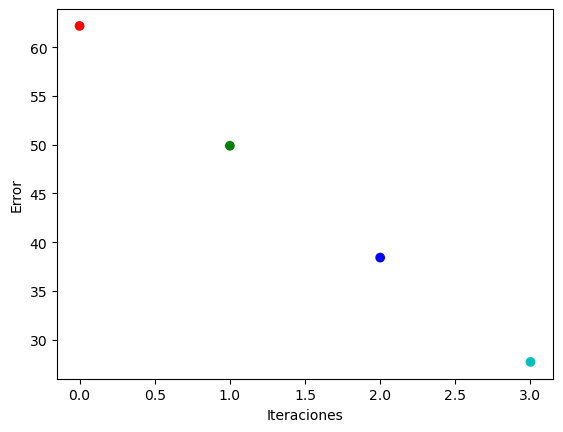

In [17]:
salida(peso,y_test,pred,erro_estim)